In [43]:
import matplotlib.pyplot as plt

import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rc('font', family='GULIM')

In [44]:
pred1=pd.read_csv('Files/BiLSTM/additionalX_BZ.csv', index_col=0)
pred3=pd.read_csv('Files/Backbone_SP.csv', index_col=0)

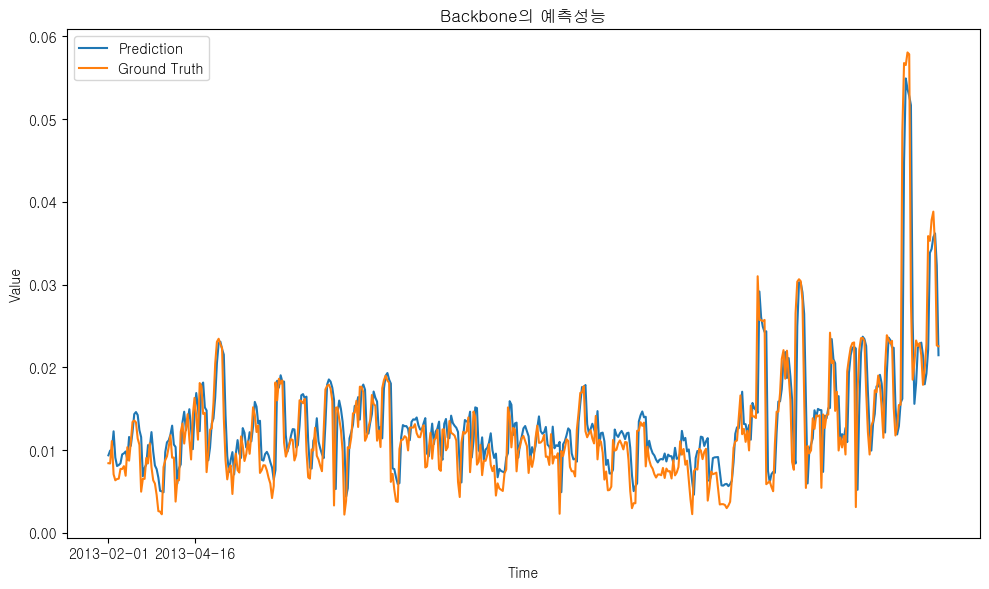

In [20]:
plt.figure(figsize=(10,6))
plt.plot( pred3['Predictions'], label='Prediction')
plt.plot( pred3['Ground Truths'],label='Ground Truth')
plt.title('Backbone의 예측성능')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred3.index[0:100:50])
plt.tight_layout()
plt.show()

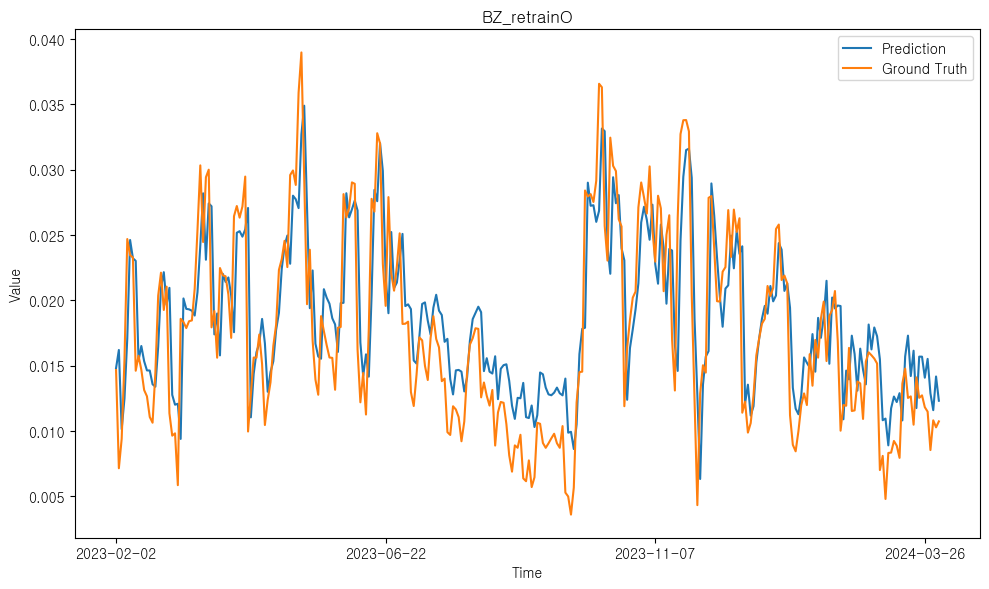

In [46]:
plt.figure(figsize=(10,6))
plt.plot( pred1['Predictions'].iloc[:-2], label='Prediction')
plt.plot( pred1['Ground Truths'].iloc[:-2],label='Ground Truth')
plt.title('BZ_retrainO')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(pred1.index[0:-1:96])
plt.tight_layout()
plt.show()

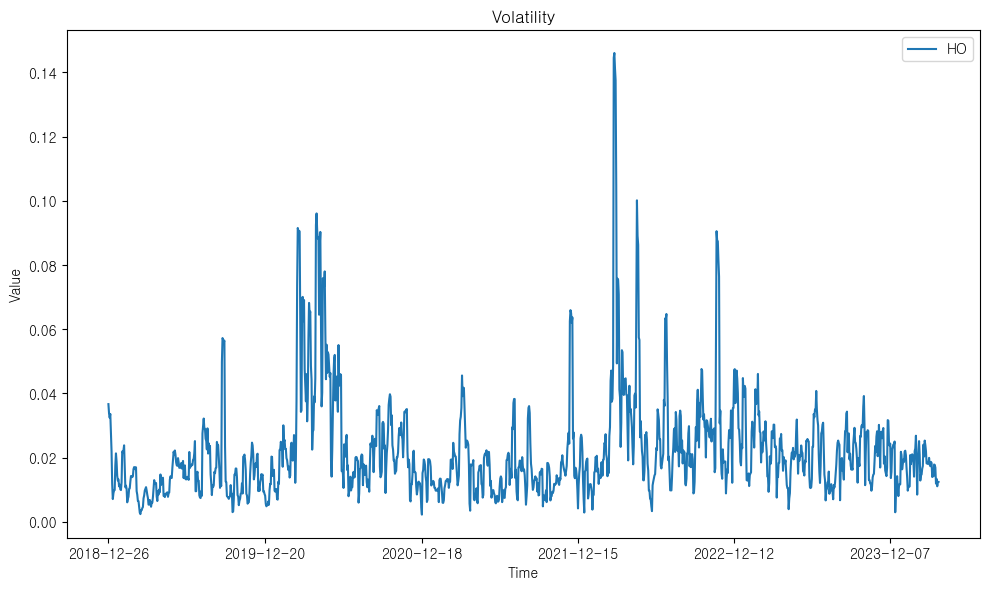

In [136]:
CL_vol = pd.read_csv('Database/oil_std/CL_vol.csv', index_col=0)
HO_vol = pd.read_csv('Database/oil_std/HO_vol.csv', index_col=0)
NG_vol = pd.read_csv('Database/oil_std/NG_vol.csv', index_col=0)
RB_vol = pd.read_csv('Database/oil_std/RB_vol.csv', index_col=0)
BZ_vol = pd.read_csv('Database/oil_std/BZ_vol.csv', index_col=0)
ZL_vol = pd.read_csv('Database/oil_std/ZL_vol.csv', index_col=0)

plt.figure(figsize=(10, 6))
# plt.plot(CL_vol['return'][:500], label='CL')
plt.plot(HO_vol['return'][1000:], label='HO')
# plt.plot(NG_vol['return'][:500], label='NG')
# plt.plot(RB_vol['return'][:500], label='RB')
# plt.plot(BZ_vol['return'][:500], label='BZ')
# plt.plot(ZL_vol['return'][:500], label='ZL')
plt.title('Volatility')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(CL_vol.index[1000:-1:249])
plt.tight_layout()
plt.show()